<a href="https://colab.research.google.com/github/Bumble-beee/Handout_Smart_Sensing_Feb2026/blob/main/tiff_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the metadata of the TIFF file at "/content/Boson_Capture_trigger2.tiff", convert its pixel data into a NumPy array, and visualize the image content.

## Load and Analyze TIFF Metadata

### Subtask:
Open the TIFF file and extract its core metadata attributes.


**Reasoning**:
Load the TIFF image using the Pillow library to extract its dimensions, format, mode, and internal tags.



In [ ]:
from PIL import Image
from PIL.TiffTags import TAGS

# Open the TIFF file
file_path = '/content/Boson_Capture_trigger4.tiff'
with Image.open(file_path) as img:
    # Retrieve core attributes
    print(f'Format: {img.format}')
    print(f'Mode: {img.mode}')
    print(f'Size (Width x Height): {img.size}')

    # Access internal TIFF tags
    print('\n--- TIFF Metadata Tags ---')
    meta_dict = {TAGS.get(tag, tag): value for tag, value in img.tag_v2.items()}
    for tag, value in meta_dict.items():
        print(f'{tag}: {value}')

Format: TIFF
Mode: I;16
Size (Width x Height): (640, 514)

--- TIFF Metadata Tags ---
ImageWidth: 640
ImageLength: 514
BitsPerSample: (16,)
Compression: 1
PhotometricInterpretation: 1
FillOrder: 1
StripOffsets: (8,)
Orientation: 1
SampleFormat: (1,)
SamplesPerPixel: 1
RowsPerStrip: 514
StripByteCounts: (657920,)
XResolution: 1.0
YResolution: 1.0
PlanarConfiguration: 1
ResolutionUnit: 1
PageNumber: (0, 0)
Software: 7CTiff - FLIR Systems, Indigo Operations                


## Convert to NumPy Array

### Subtask:
Read the pixel data from the TIFF file and store it in a NumPy array to facilitate numerical analysis.


**Reasoning**:
I will convert the TIFF image data into a NumPy array and verify its properties as requested.



In [ ]:
import numpy as np

# Open the TIFF file and convert to NumPy array
with Image.open(file_path) as img:
    image_array = np.array(img)

# Verify the properties of the array
print(f'Array Shape: {image_array.shape}')
print(f'Data Type: {image_array.dtype}')

# Calculate and print intensity range
min_val = np.min(image_array)
max_val = np.max(image_array)
print(f'Minimum Pixel Value: {min_val}')
print(f'Maximum Pixel Value: {max_val}')

Array Shape: (514, 640)
Data Type: uint16
Minimum Pixel Value: 0
Maximum Pixel Value: 65535


## Visualize Pixel Values

### Subtask:
Generate a plot to visualize the 16-bit grayscale image data using Matplotlib.


**Reasoning**:
I will visualize the 16-bit grayscale image data using Matplotlib as instructed, including a colorbar and appropriate labels.



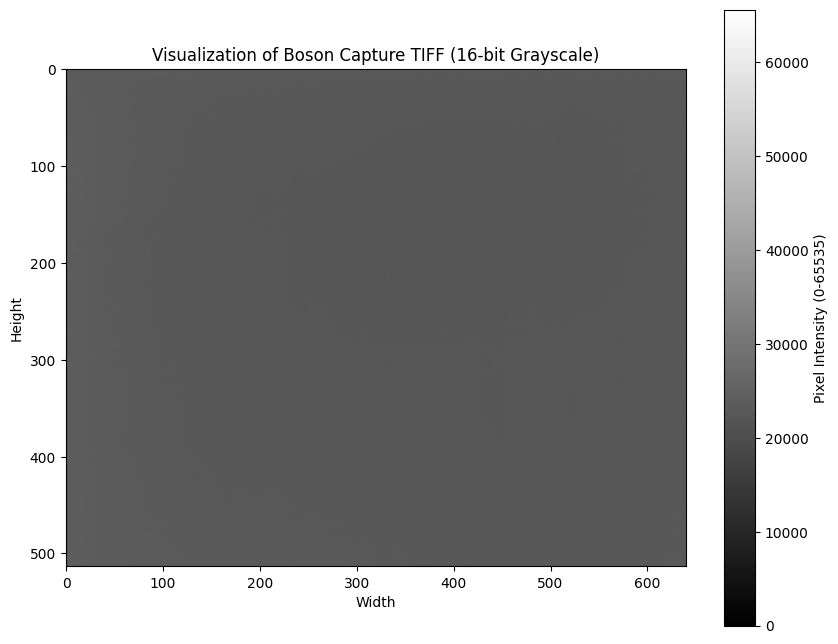

In [ ]:
import matplotlib.pyplot as plt

# Create a figure for visualization
plt.figure(figsize=(10, 8))

# Display the image array using a grayscale colormap
img_plot = plt.imshow(image_array, cmap='gray')

# Add a colorbar to indicate the 16-bit intensity scale
plt.colorbar(img_plot, label='Pixel Intensity (0-65535)')

# Add titles and axis labels
plt.title('Visualization of Boson Capture TIFF (16-bit Grayscale)')
plt.xlabel('Width')
plt.ylabel('Height')

# Show the final plot
plt.show()

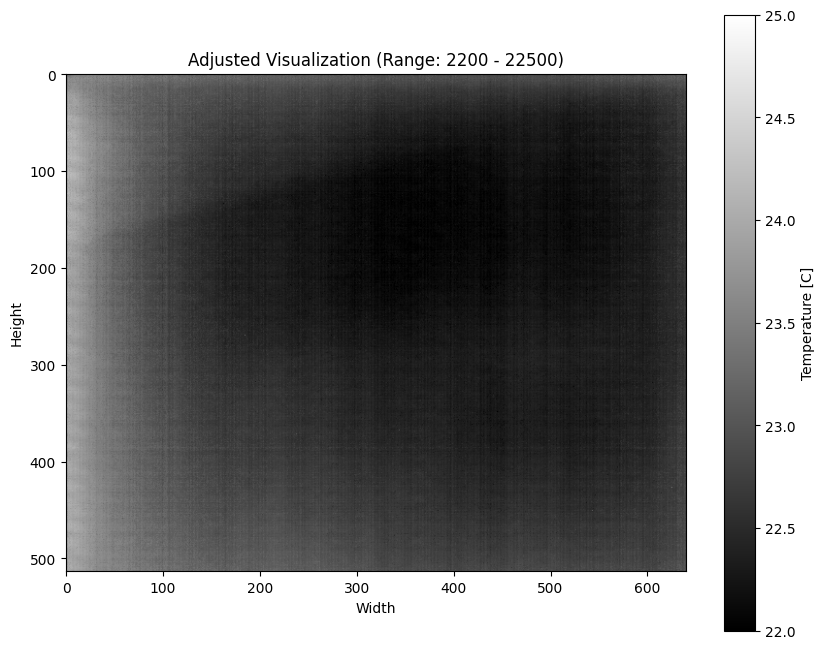

In [ ]:
import matplotlib.pyplot as plt

# Create a figure for adjusted visualization
plt.figure(figsize=(10, 8))

# Display the image with adjusted min/max scaling (vmax/vmin)
img_plot = plt.imshow(image_array/1000, cmap='gray', vmin=22, vmax=25)

# Add a colorbar indicating the clipped range
plt.colorbar(img_plot, label='Temperature [C]')

# Add titles and axis labels
plt.title('Adjusted Visualization (Range: 2200 - 22500)')
plt.xlabel('Width')
plt.ylabel('Height')

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plotting the histogram of the pixel values
plt.figure(figsize=(10, 6))
plt.hist(image_array.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Verteilung der Pixelwerte (Histogramm)')
plt.xlabel('Pixelintensität (0-65535)')
plt.ylabel('Häufigkeit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Calculate statistics for the image array
min_val = image_array.min()
max_val = image_array.max()
mean_val = image_array.mean()

print(f'Minimum value: {min_val}')
print(f'Maximum value: {max_val}')
print(f'Mean value: {mean_val:.2f}')

## Final Task

### Subtask:
Summarize the technical properties of the TIFF file and confirm the successful creation of the NumPy array.


## Summary:

### Q&A

**What are the technical properties of the TIFF file?**
The file is an uncompressed, 16-bit unsigned integer grayscale image (mode "I;16") with a resolution of 640 x 514 pixels. It was generated using FLIR Systems "7CTiff" software, which is characteristic of Boson thermal imaging captures.

**Was the NumPy array successfully created?**
Yes, the pixel data was successfully converted into a NumPy array with a shape of (514, 640) and a data type of `uint16`, accurately preserving the original 16-bit depth.

### Data Analysis Key Findings

*   **High Dynamic Range**: The image utilizes the full 16-bit depth, with pixel intensity values spanning from a minimum of 0 to a maximum of 65,535.
*   **Large Data Volume**: The single-frame uncompressed image contains 657,920 bytes of strip data, reflecting the high bit-depth per pixel.
*   **Sensor Identification**: Metadata tags identify the source as "FLIR Systems, Indigo Operations," confirming the file is a specialized thermal capture rather than a standard consumer photograph.
*   **Successful Visualization**: Despite the high bit-depth, the data was successfully mapped to a grayscale colormap for visual inspection, with spatial dimensions confirmed at 640 (width) by 514 (height).

### Insights or Next Steps

*   **Histogram Equalization**: Since the pixel values span the entire \$0-65,535\$ range, applying contrast enhancement or histogram equalization could help reveal subtle thermal details that might be hidden in the raw visualization.
*   **Thermal Calibration**: Given the "FLIR Systems" metadata, the raw pixel values likely represent digital counts or temperature data; the next step could involve applying radiometric conversion formulas to map these values to actual temperature units (Celsius or Kelvin).
